In [2]:
# Import Importance Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, ConfusionMatrixDisplay, auc
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [3]:
data=pd.read_csv("E:\ml-learning-portfolio\ml-learning-portfolio\day 6\data\diabetes.csv")
print(f" Total data {data.shape}")

 Total data (767, 9)


In [4]:
df=data.copy(deep=True)

In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


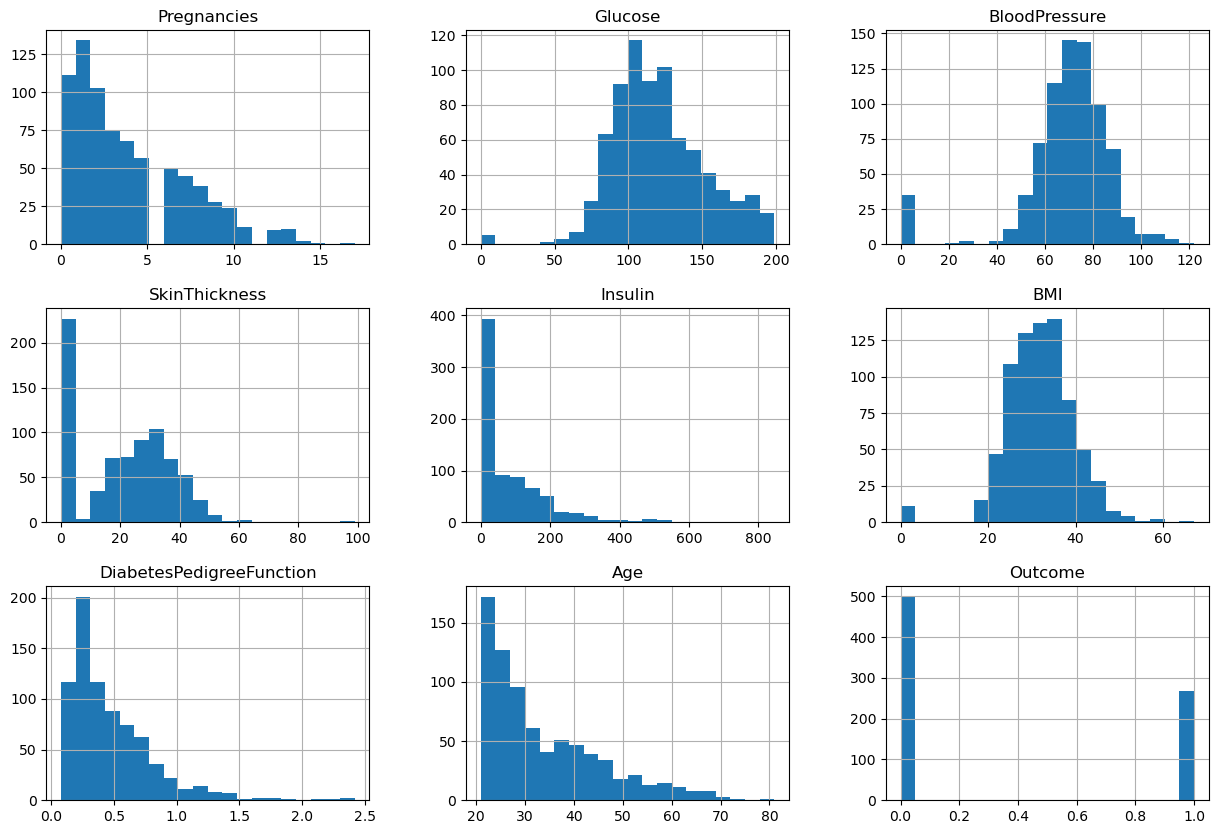

In [9]:
df.hist(bins=20, figsize=(15, 10))
plt.show()

<Figure size 1200x900 with 0 Axes>

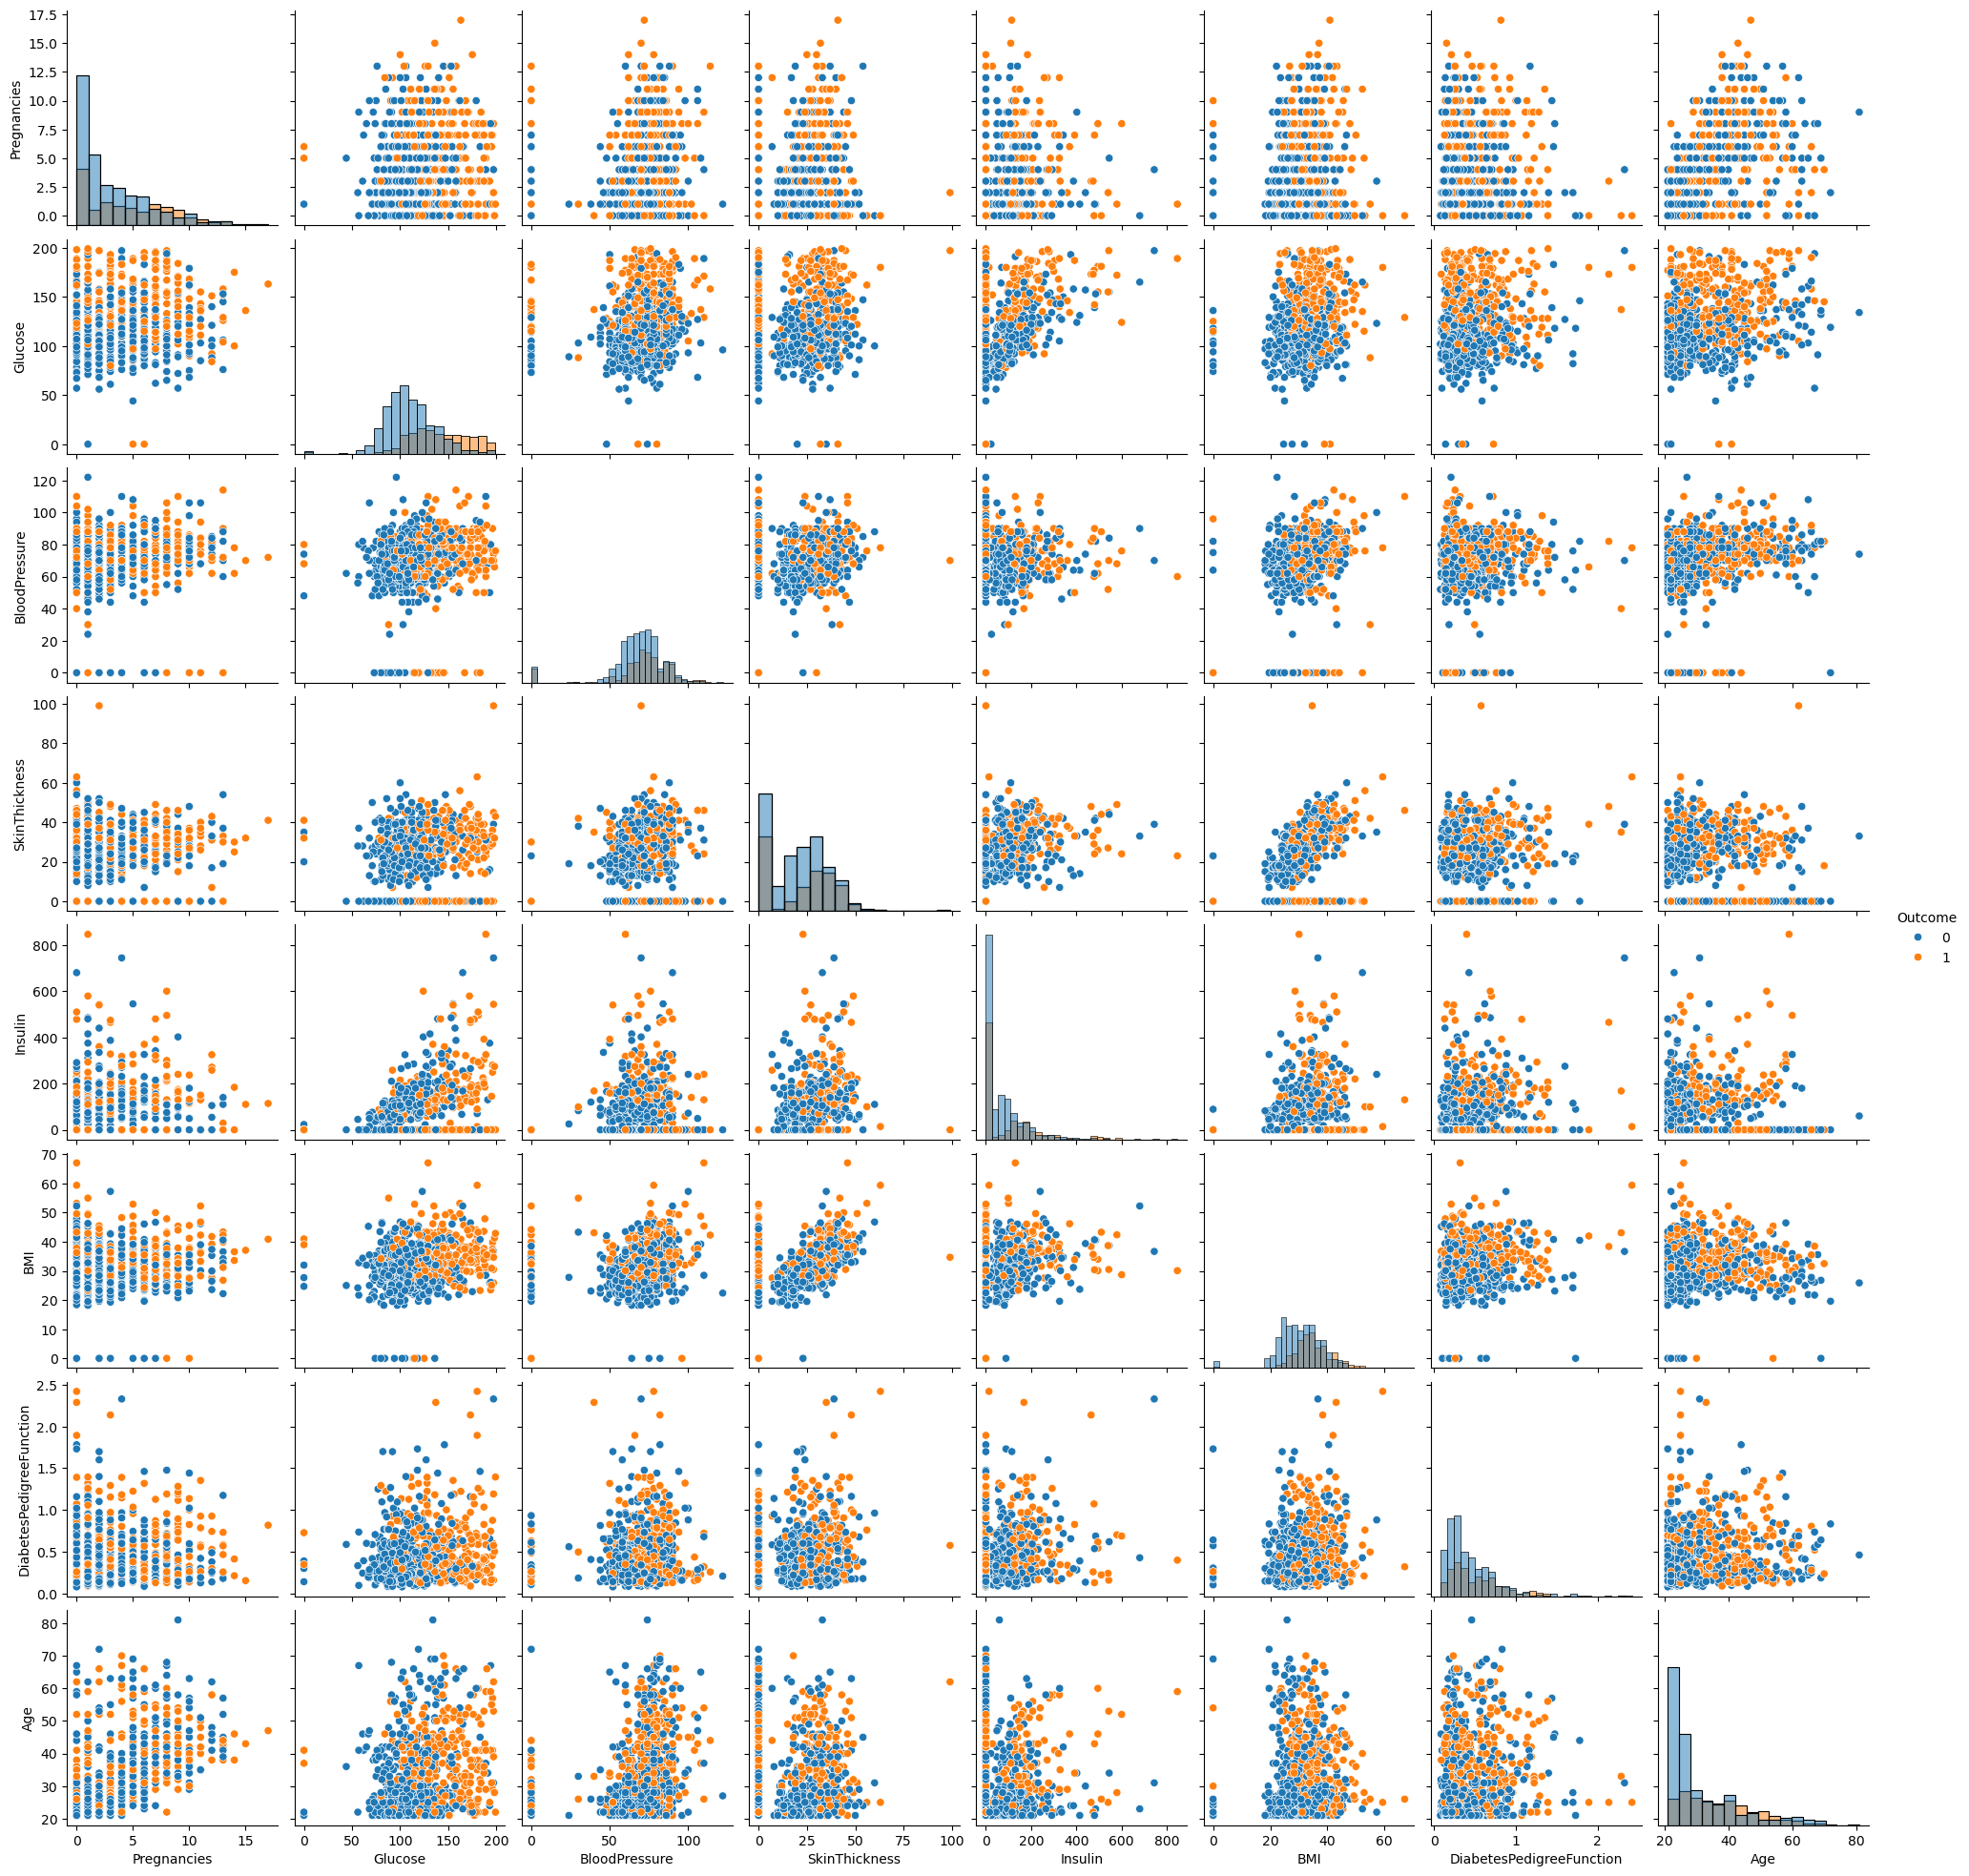

In [10]:
plt.figure(figsize=(12,9))
sns.pairplot(df,hue='Outcome',diag_kind='hist')
plt.show()

In [11]:
pd.set_option('Display.max_columns',None)
pd.set_option('Display.max_rows',None)

# Pearson correlation:


<AxesSubplot:>

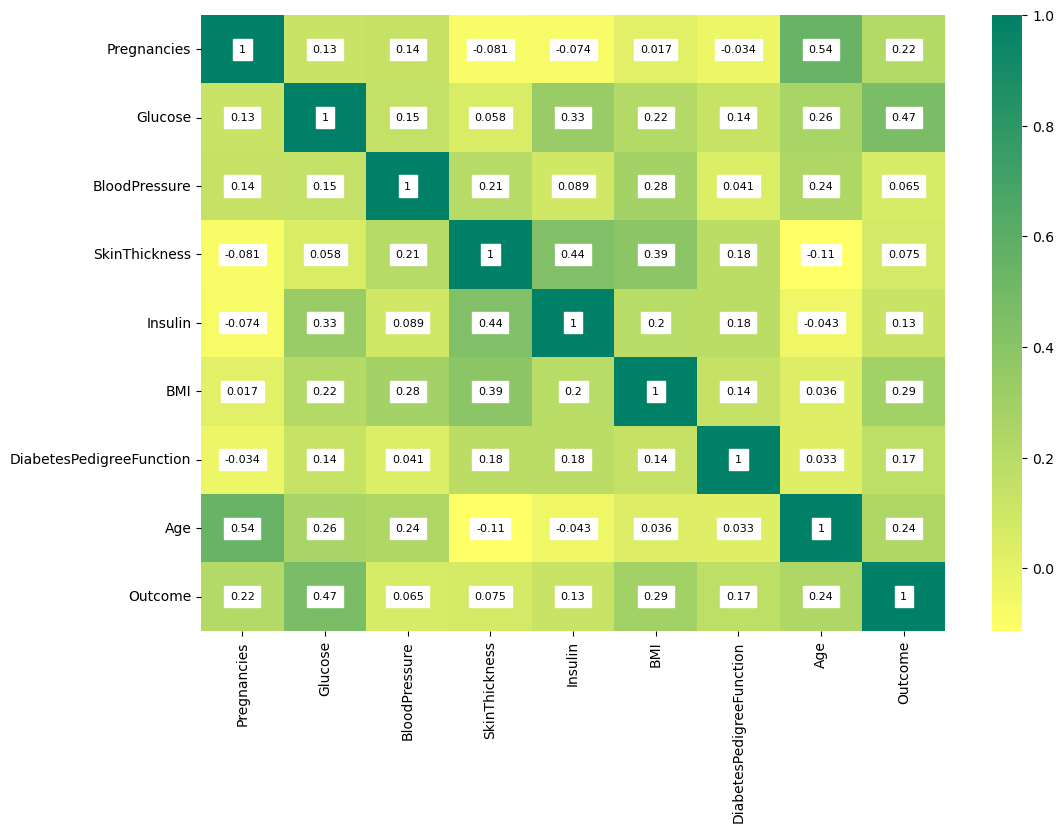

In [12]:
plt.figure(figsize=(12,8))
annot_modify={'fontsize':8,'color':"k",'verticalalignment':'center','backgroundcolor':"w"}
sns.heatmap(df.corr(),annot=True,cmap='summer_r',annot_kws=annot_modify)

In [13]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()

from sklearn.preprocessing import StandardScaler
scale=StandardScaler()


In [14]:
scale.fit(df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']])


StandardScaler()

In [15]:
X=scale.transform(df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']])

In [16]:
y=df['Outcome']

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [18]:
metrics = ['euclidean', 'manhattan', 'minkowski']
k_values = [3, 5, 7, 9, 15]

results = []

for metric in metrics:
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric, weights='distance')

        cv = KFold(n_splits=5, shuffle=True, random_state=42)

        y_pred = cross_val_predict(knn, X_train, y_train, cv=cv)

        accuracy = accuracy_score(y_train, y_pred)
        precision = precision_score(y_train, y_pred, average='binary')
        recall = recall_score(y_train, y_pred, average='binary')
        f1 = f1_score(y_train, y_pred, average='binary')

        results.append({
            'Metric': metric,
            'K': k,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1
        })

results_df = pd.DataFrame(results)

print(results_df)

best_result = results_df.loc[results_df['F1 Score'].idxmax()]
print("\nBest Result:")
print(best_result)


       Metric   K  Accuracy  Precision    Recall  F1 Score
0   euclidean   3  0.738806   0.633721  0.586022  0.608939
1   euclidean   5  0.729478   0.627329  0.543011  0.582133
2   euclidean   7  0.744403   0.654088  0.559140  0.602899
3   euclidean   9  0.746269   0.664474  0.543011  0.597633
4   euclidean  15  0.742537   0.671429  0.505376  0.576687
5   manhattan   3  0.733209   0.625731  0.575269  0.599440
6   manhattan   5  0.740672   0.657718  0.526882  0.585075
7   manhattan   7  0.746269   0.673611  0.521505  0.587879
8   manhattan   9  0.740672   0.671533  0.494624  0.569659
9   manhattan  15  0.757463   0.718750  0.494624  0.585987
10  minkowski   3  0.738806   0.633721  0.586022  0.608939
11  minkowski   5  0.729478   0.627329  0.543011  0.582133
12  minkowski   7  0.744403   0.654088  0.559140  0.602899
13  minkowski   9  0.746269   0.664474  0.543011  0.597633
14  minkowski  15  0.742537   0.671429  0.505376  0.576687

Best Result:
Metric       euclidean
K                  

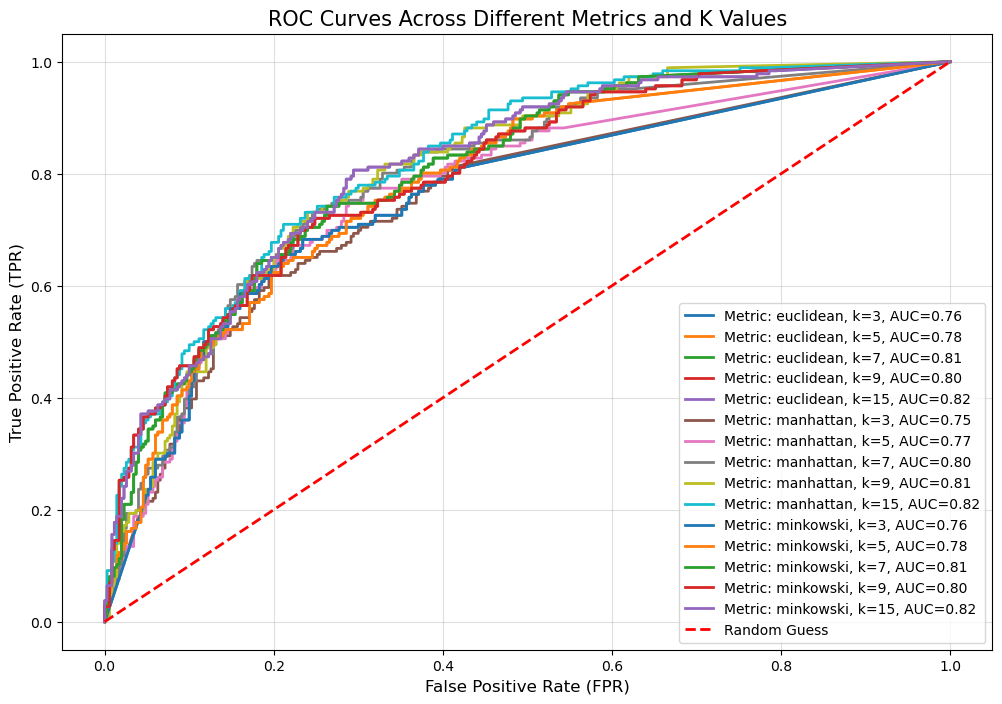

In [19]:
plt.figure(figsize=(12, 8))

for metric in metrics:
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric, weights='distance')

        cv = KFold(n_splits=5, shuffle=True, random_state=42)
        knn.fit(X_train, y_train)

        y_pred = cross_val_predict(knn, X_train, y_train, cv=cv, method='predict')
        y_prob = cross_val_predict(knn, X_train, y_train, cv=cv, method='predict_proba')

        fpr, tpr, _ = roc_curve(y_train, y_prob[:, 1])
        auc_score = auc(fpr, tpr)

        plt.plot(fpr, tpr, lw=2, label=f'Metric: {metric}, k={k}, AUC={auc_score:.2f}')

plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2, label='Random Guess')

plt.title("ROC Curves Across Different Metrics and K Values", fontsize=15)
plt.xlabel("False Positive Rate (FPR)", fontsize=12)
plt.ylabel("True Positive Rate (TPR)", fontsize=12)
plt.legend(loc="lower right")
plt.grid(alpha=0.4)
plt.show()

In [20]:
param_grid = {
    'n_neighbors': range(1, 21),
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'weights': ['uniform', 'distance']
}

knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

best_knn = grid_search.best_estimator_


Best Parameters: {'metric': 'euclidean', 'n_neighbors': 16, 'weights': 'distance'}


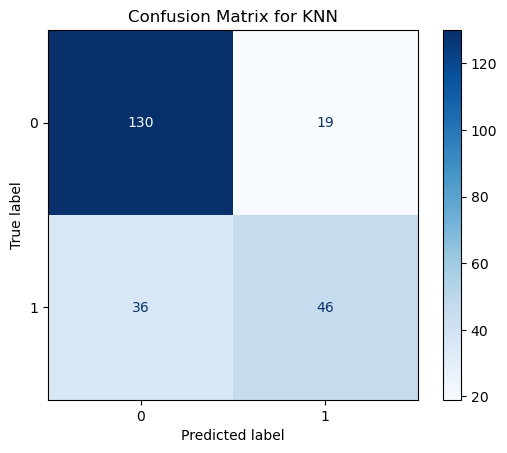




Confusion matrix of 

       Accuracy  Recall (Sensitivity)  Specificity  Precision  F1 Score
Value  0.761905              0.560976     0.872483   0.707692   0.62585


In [21]:
y_pred = best_knn.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=best_knn.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for KNN")
plt.grid(False)
plt.show()

tn, fp, fn, tp = conf_matrix.ravel()
accuracy = (tp + tn) / (tp + tn + fp + fn)
recall = tp / (tp + fn)
specificity = tn / (tn + fp)
precision = tp / (tp + fp)
f1 = 2 * (precision * recall) / (precision + recall)

metrics = {
    "Accuracy": accuracy,
    "Recall (Sensitivity)": recall,
    "Specificity": specificity,
    "Precision": precision,
    "F1 Score": f1
}
metrics_df = pd.DataFrame(metrics, index=["Value"])
print('\n\n')
print(f"Confusion matrix of \n")
print(metrics_df)


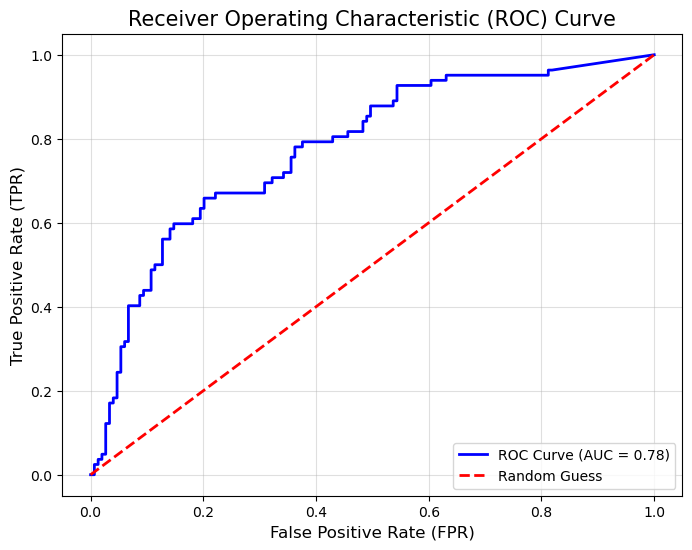

In [22]:
y_prob = best_knn.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2, label='Random Guess')
plt.xlabel("False Positive Rate (FPR)", fontsize=12)
plt.ylabel("True Positive Rate (TPR)", fontsize=12)
plt.title("Receiver Operating Characteristic (ROC) Curve", fontsize=15)
plt.legend(loc="lower right")
plt.grid(alpha=0.4)
plt.show()

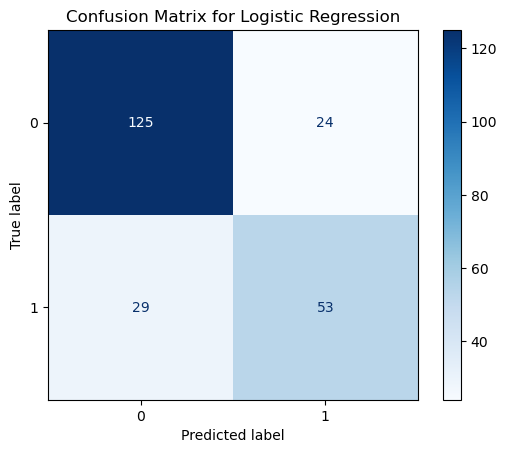

       Accuracy  Recall (Sensitivity)  Specificity  Precision  F1 Score
Value  0.770563              0.646341     0.838926   0.688312  0.666667


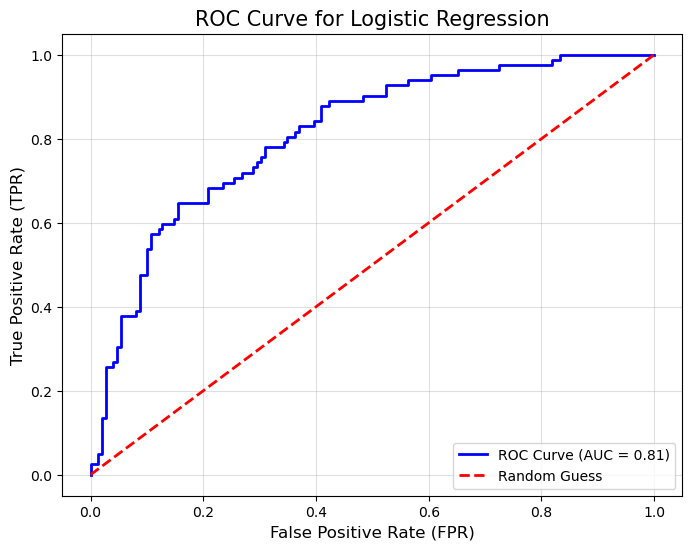

In [23]:
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for Logistic Regression")
plt.grid(False)
plt.show()

tn, fp, fn, tp = conf_matrix.ravel()
accuracy = (tp + tn) / (tp + tn + fp + fn)
recall = tp / (tp + fn)
specificity = tn / (tn + fp)
precision = tp / (tp + fp)
f1 = 2 * (precision * recall) / (precision + recall)

metrics = {
    "Accuracy": accuracy,
    "Recall (Sensitivity)": recall,
    "Specificity": specificity,
    "Precision": precision,
    "F1 Score": f1
}
metrics_df = pd.DataFrame(metrics, index=["Value"])
print(metrics_df)

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2, label='Random Guess')
plt.xlabel("False Positive Rate (FPR)", fontsize=12)
plt.ylabel("True Positive Rate (TPR)", fontsize=12)
plt.title("ROC Curve for Logistic Regression", fontsize=15)
plt.legend(loc="lower right")
plt.grid(alpha=0.4)
plt.show()

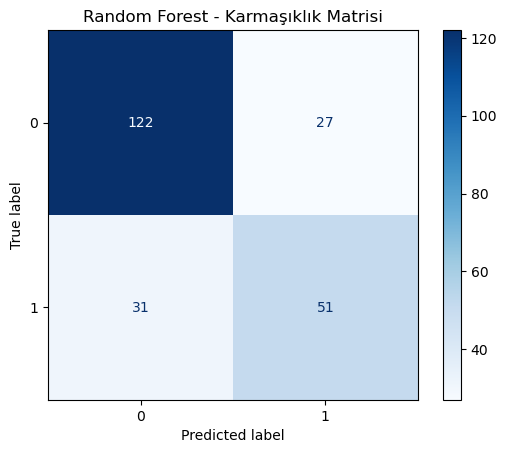

       Accuracy  Recall (Sensitivity)  Specificity  Precision  F1 Score
Value  0.748918              0.621951     0.818792   0.653846    0.6375


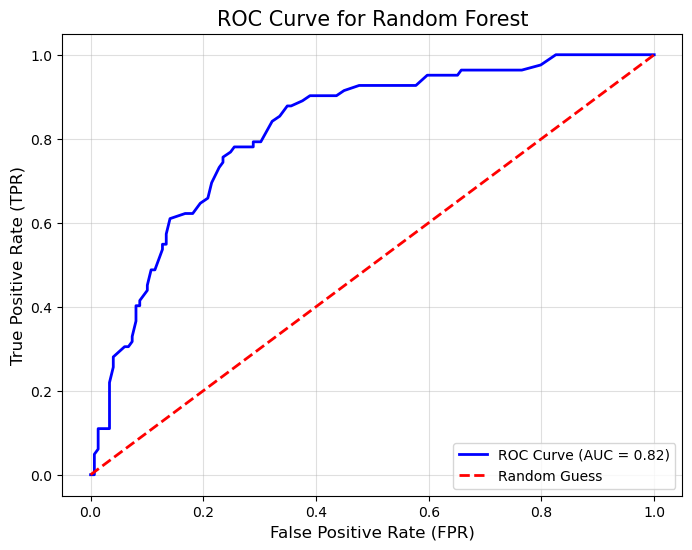

In [24]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title("Random Forest - Karmaşıklık Matrisi")
plt.grid(False)
plt.show()

tn, fp, fn, tp = conf_matrix.ravel()
accuracy = (tp + tn) / (tp + tn + fp + fn)
recall = tp / (tp + fn)
specificity = tn / (tn + fp)
precision = tp / (tp + fp)
f1 = 2 * (precision * recall) / (precision + recall)

metrics = {
    "Accuracy": accuracy,
    "Recall (Sensitivity)": recall,
    "Specificity": specificity,
    "Precision": precision,
    "F1 Score": f1
}
metrics_df = pd.DataFrame(metrics, index=["Value"])
print(metrics_df)

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2, label='Random Guess')
plt.xlabel("False Positive Rate (FPR)", fontsize=12)
plt.ylabel("True Positive Rate (TPR)", fontsize=12)
plt.title("ROC Curve for Random Forest", fontsize=15)
plt.legend(loc="lower right")
plt.grid(alpha=0.4)
plt.show()

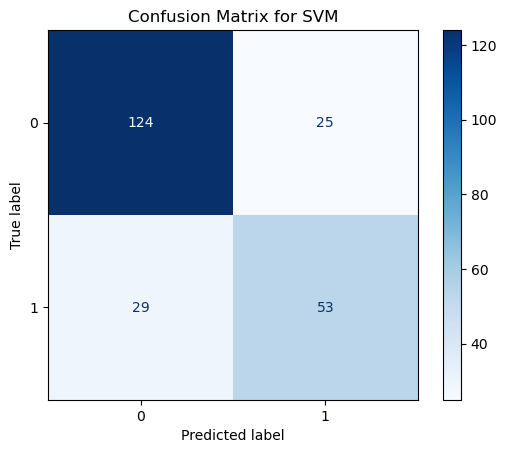

       Accuracy  Recall (Sensitivity)  Specificity  Precision  F1 Score
Value  0.766234              0.646341     0.832215   0.679487    0.6625


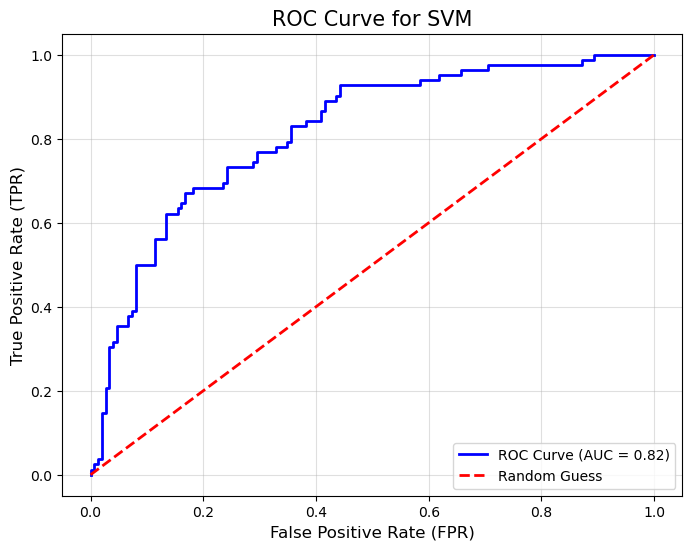

In [25]:
model = SVC(probability=True, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for SVM")
plt.grid(False)
plt.show()

tn, fp, fn, tp = conf_matrix.ravel()
accuracy = (tp + tn) / (tp + tn + fp + fn)
recall = tp / (tp + fn)  #
specificity = tn / (tn + fp)
precision = tp / (tp + fp)
f1 = 2 * (precision * recall) / (precision + recall)

metrics = {
    "Accuracy": accuracy,
    "Recall (Sensitivity)": recall,
    "Specificity": specificity,
    "Precision": precision,
    "F1 Score": f1
}
metrics_df = pd.DataFrame(metrics, index=["Value"])
print(metrics_df)

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2, label='Random Guess')
plt.xlabel("False Positive Rate (FPR)", fontsize=12)
plt.ylabel("True Positive Rate (TPR)", fontsize=12)
plt.title("ROC Curve for SVM", fontsize=15)
plt.legend(loc="lower right")
plt.grid(alpha=0.4)
plt.show()